# Collaboration

In [27]:
import numpy as np
import networkx as nx
G = nx.read_edgelist('networks/networks_barabasi/collaboration.edgelist.txt',create_using=nx.Graph(), nodetype = int)

## Visualização

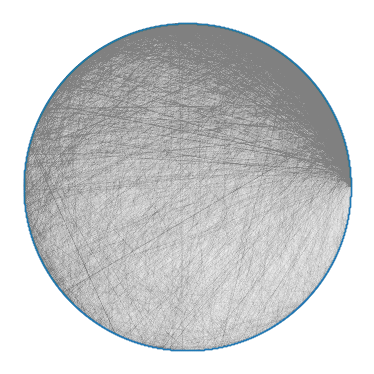

In [39]:
plt.figure(figsize=(5,5))
nx.draw_circular(G, node_shape='.', node_size=0.3, edge_color='grey', alpha=0.2, width=0.01)
plt.show()

## Caracterização

In [29]:
n = G.number_of_nodes()
m = G.number_of_edges()
print('Número de vértices:', n)
print('Número de arestas:', m)
print('Grafo conexo?',nx.is_connected(G))

Número de vértices: 23133
Número de arestas: 93439
Grafo conexo? False


### 1) Grau

In [9]:
degrees = np.array([val for (node, val) in G.degree()])

In [30]:
from statistics import median
print('Máximo:', degrees.max())
print('Mínimo:', degrees.min())
print('Média:',degrees.mean())
print('Mediana:', median(degrees))
print('Desvio padrão:', degrees.std())


Máximo: 468
Mínimo: 0
Média: 25.624161073825505
Mediana: 8.0
Desvio padrão: 42.927373740336265


#### Distribuição empírica

PMF:

In [ ]:
x, f = np.unique(degrees, return_counts=True)
plt.scatter(x,f)
#plt.xticks(range(1,len(f)+1))
plt.show()

CCDF:

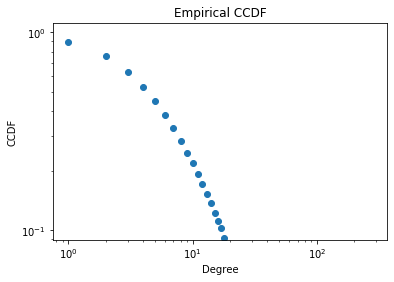

In [51]:
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf

# Outro médodo:
#ccdf2 = np.zeros(len(f))
#for k,_ in enumerate(f):
#    ccdf2[k]  = 1-f[0:k+1].sum()

plt.title('Empirical CCDF')
plt.scatter(range(1,len(f)+1),ccdf)
#plt.plot(range(1,len(f)+1),ccdf2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.show()

### 2) Distância 

Calculando a distância entre cada par de vértices:

In [ ]:
dist = np.array([])
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v) # distância short path lenght
    spl2 = dict((v2,d) for v2,d in spl.items() if v2 != v) # distância exluindo d(v,v)
    dist = np.append(dist, list(spl2.values()))

Estatísticas básicas:

In [18]:
print('Máximo:', dist.max())
print('Mínimo:', dist.min())
print('Média:',dist.mean())
print('Mediana:', median(dist))
print('Desvio padrão:', dist.std())

Máximo: 9.0
Mínimo: 1.0
Média: 3.3901837252152363
Mediana: 3.0
Desvio padrão: 1.1301573453112792


Verificando o cálculo da distância média através do método disponibilizado pela biblioteca:

In [19]:
#d_mean = nx.average_shortest_path_length(G)
#print('Distância média:',d_mean)

NetworkXError: Graph is not weakly connected.

Frequência relativa e CCDF:

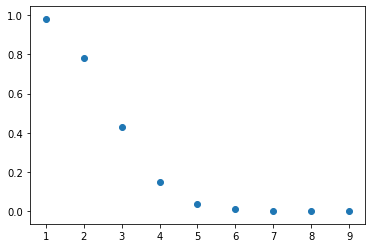

In [21]:
from scipy.special import comb
Lmax = comb(n,2) # número máximo de arestas

counts, f_d = np.unique(dist, return_counts=True)
cdf = f_d.cumsum()/f_d.sum()
ccdf = 1-cdf

plt.scatter(counts,ccdf)
plt.show()

### 3) Tamanho das componentes conexas

Número de componentes conexas:

In [ ]:
nx.number_connected_components(G)

Tamanho das componentes:

In [ ]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

### 4) Clusterização

#### 4.1) Clusterização Local

In [ ]:
cluster = np.array(list(nx.clustering(G).values()))
print('Máximo:', cluster.max())
print('Mínimo:', cluster.min())
print('Média:', cluster.mean())
print('Mediana:', median(cluster))
print('Desvio padrão:', cluster.std())

Verificando a clusterização média:

In [807]:
nx.average_clustering(G)

0.5706384782076823

PMF:

In [ ]:
x, f = np.unique(cluster, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf)
plt.show()

CCDF:

In [ ]:
x, f = np.unique(cluster, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf

plt.scatter(x,ccdf)
plt.show()

#### 4.2) Clusterização global

In [ ]:
n_triang = np.array(list(nx.triangles(G).values())).sum()/3 # método conta 3 vezes o triângula (1x para cada vértice)
print('Número de triângulos:', n_triang)

Clusterização global:

In [ ]:
nx.transitivity(G)

### 5) Centralidade

#### 5.1) Centralidade de Grau

In [ ]:
cent = np.array(list(nx.degree_centrality(G).values()))
print('Máximo:', cent.max())
print('Mínimo:', cent.min())
print('Média:', cent.mean())
print('Mediana:', median(cent))
print('Desvio padrão:', cent.std())

CCDF:

In [ ]:
x, f = np.unique(cent, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.xscale('log')
plt.yscale('log')
plt.show()

#### 5.2) Betweeness

In [ ]:
btw = np.array(list(nx.betweenness_centrality(G).values()))
print('Máximo:', btw.max())
print('Mínimo:', btw.min())
print('Média:', btw.mean())
print('Mediana:', median(btw))
print('Desvio padrão:', btw.std())

PMF:

In [ ]:
x, f = np.unique(btw, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf)
plt.show()

CCDF:

In [ ]:
x, f = np.unique(btw, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

Visualziação do Betweenes:

In [ ]:
#nx.draw_circular(G, node_color=btw, cmap=plt.cm.Blues, with_labels=True)

#### 5.3) Closeness

In [ ]:
close = np.array(list(nx.closeness_centrality(G).values()))
print('Máximo:', close.max())
print('Mínimo:', close.min())
print('Média:', close.mean())
print('Mediana:', median(close))
print('Desvio padrão:', close.std())

In [ ]:
x, f = np.unique(close, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

In [ ]:
#nx.draw_circular(G, node_color=close, cmap=plt.cm.Blues, with_labels=True)

#### 5.4) Auto-Vetor

In [ ]:
ev = np.array(list(nx.eigenvector_centrality(G).values()))
print('Máximo:', ev.max())
print('Mínimo:', ev.min())
print('Média:', ev.mean())
print('Mediana:', median(ev))
print('Desvio padrão:', ev.std())

In [ ]:
x, f = np.unique(ev, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

In [ ]:
#nx.draw_circular(G, node_color=ev, cmap=plt.cm.Blues, with_labels=True)

#### 5.6) PageRank

In [ ]:
pr = np.array(list(nx.pagerank(G, alpha=0.9).values()))
print('Máximo:', pr.max())
print('Mínimo:', pr.min())
print('Média:', pr.mean())
print('Mediana:', median(pr))
print('Desvio padrão:', pr.std())

In [ ]:
x, f = np.unique(pr, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
#nx.draw_circular(G, node_color=pr, cmap=plt.cm.Blues, with_labels=True)

### 6) Similaridade

#### 6.1) Jaccard

In [ ]:
jaccard = np.array([p for (u, v, p) in nx.jaccard_coefficient(G)])
print('Máximo:', jaccard.max())
print('Mínimo:', jaccard.min())
print('Média:', jaccard.mean())
print('Mediana:', median(jaccard))
print('Desvio padrão:', jaccard.std())

In [ ]:
x, f = np.unique(jaccard, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
mapa = [[u,v, p] for (u, v, p) in nx.jaccard_coefficient(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
#plt.xticks(locs,range(1,33,2))
plt.xlabel('v')
plt.ylabel('u')
plt.show()

#### 6.2) Adamic/Adar

In [ ]:
adamic = np.array([p for (u, v, p) in nx.adamic_adar_index(G)])
print('Máximo:', adamic.max())
print('Mínimo:', adamic.min())
print('Média:', adamic.mean())
print('Mediana:', median(adamic))
print('Desvio padrão:', adamic.std())

In [ ]:
x, f = np.unique(adamic, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

In [ ]:
#pairs = dict([((u,v), p) for (u, v, p) in nx.adamic_adar_index(G)])
mapa = [[u,v, p] for (u, v, p) in nx.adamic_adar_index(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
#plt.xticks(locs,range(1,34,2))
plt.xlabel('v')
plt.ylabel('u')
plt.show()